In [150]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [151]:
df = pd.read_csv("customer_churn.csv")

In [152]:
df.sample(3)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
595,Derek Martinez,40.0,11553.65,1,4.43,6.0,2011-08-29 06:35:54,"3004 Nash Freeway North Craigville, CT 24488",Kramer PLC,0
481,Lindsey Adams,46.0,14361.38,0,4.52,8.0,2008-07-20 08:40:26,"283 Mccarthy Fork Hubbardfort, PW 58105-7552",Morris-Williams,0
700,Roy Marshall,43.0,6098.15,0,3.74,8.0,2014-02-19 04:42:17,"55334 William Square Kaylaland, TN 06847-1171","Harrison, Cox and Russell",0


In [153]:
df['Num_Sites'].value_counts()
df['Company'].value_counts()

,count
Company,
Anderson Group,4
Wilson PLC,3
Williams PLC,3
Williams Ltd,2
Ortiz Ltd,2
...,...
"Rodriguez, Moore and Cunningham",1
Bennett Ltd,1
Cantu Inc,1


Handling Outliers

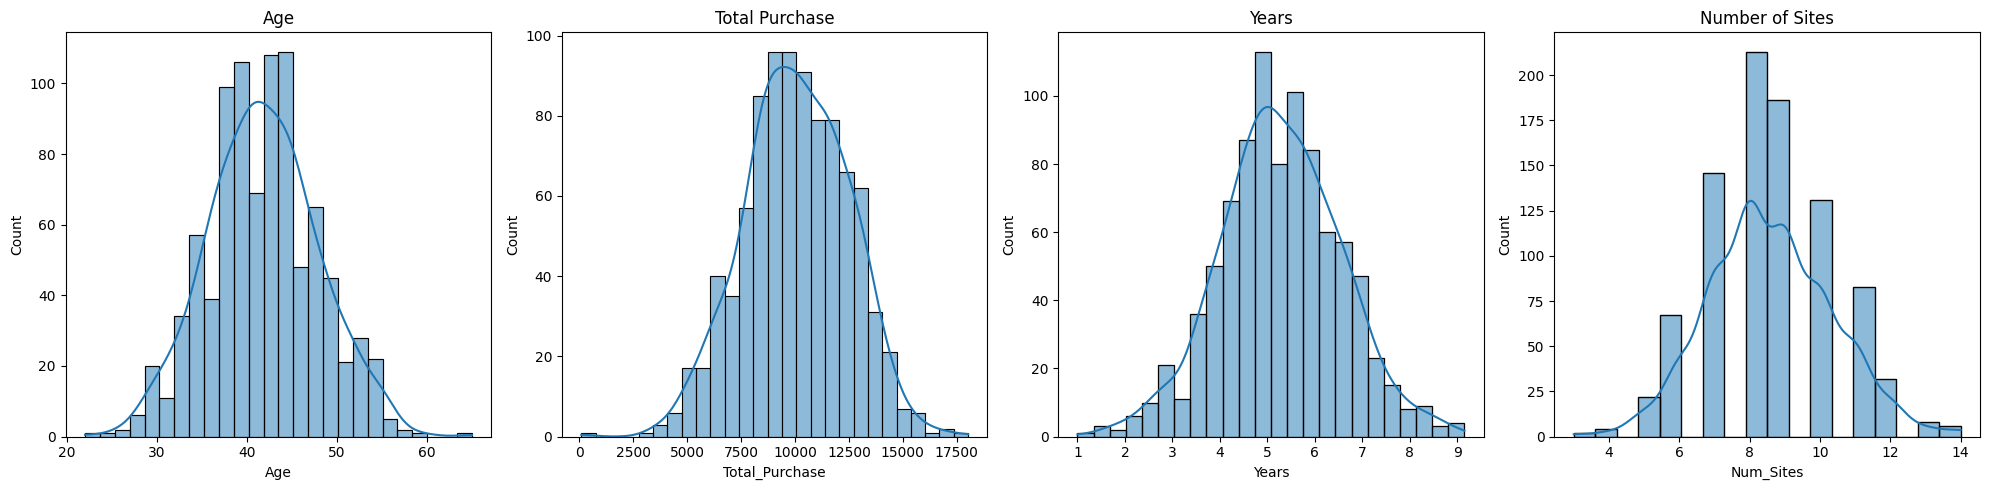

In [154]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age')

plt.subplot(1, 4, 2)
sns.histplot(df['Total_Purchase'], kde=True)
plt.title('Total Purchase')

plt.subplot(1, 4, 3)
sns.histplot(df['Years'], kde=True)
plt.title('Years')

plt.subplot(1, 4, 4)
sns.histplot(df['Num_Sites'], kde=True)
plt.title('Number of Sites')

plt.tight_layout()
plt.show()

In [155]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


AGE NORMAL DATA SO USING Z-SCORE

<Axes: ylabel='Age'>

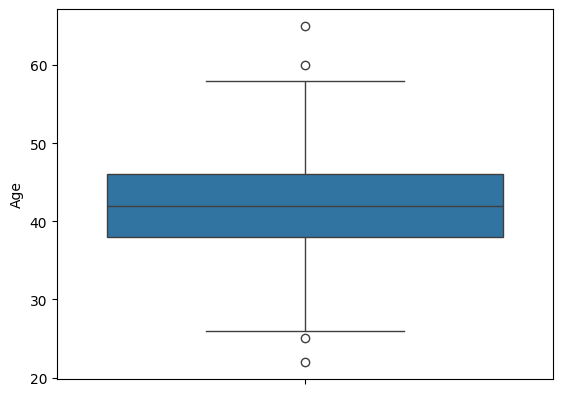

In [156]:
sns.boxplot(df['Age'])

In [157]:
print("Mean value of age",df['Age'].mean())
print("Std value of age",df['Age'].std())
print("Min value of age",df['Age'].min())
print("Max value of age",df['Age'].max())

Mean value of age 41.81666666666667
Std value of age 6.127560416916246
Min value of age 22.0
Max value of age 65.0


In [158]:
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print(upper_limit,lower_limit)

60.19934791741541 23.43398541591793


In [159]:
df['Age'] = np.where(
    df['Age']>upper_limit,
    upper_limit,
    np.where(
        df['Age']<lower_limit,
        lower_limit,
        df['Age']
    )
)

Total Purchase not Normal so using iqr

<Axes: ylabel='Total_Purchase'>

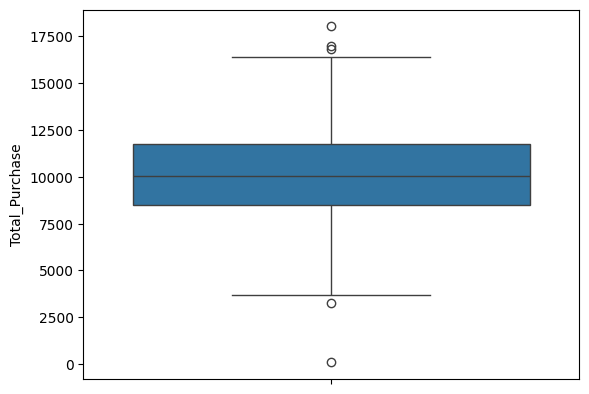

In [160]:
sns.boxplot(df['Total_Purchase'])

In [161]:
percentile25 = df['Total_Purchase'].quantile(0.25)
percentile75 = df['Total_Purchase'].quantile(0.75)
iqr = percentile75 - percentile25

In [162]:
upper_limit_1 = percentile75 + 1.5 * iqr
lower_limit_1 = percentile25 - 1.5 * iqr
print(upper_limit_1,lower_limit_1)

16654.578749999997 3602.648750000004


In [163]:
df['Total_Purchase'] = np.where(
    df['Total_Purchase']>upper_limit_1,
    upper_limit_1,
    np.where(
        df['Total_Purchase']<lower_limit_1,
        lower_limit_1,
        df['Total_Purchase']
    )
)

Years not normal so using iqr

<Axes: ylabel='Years'>

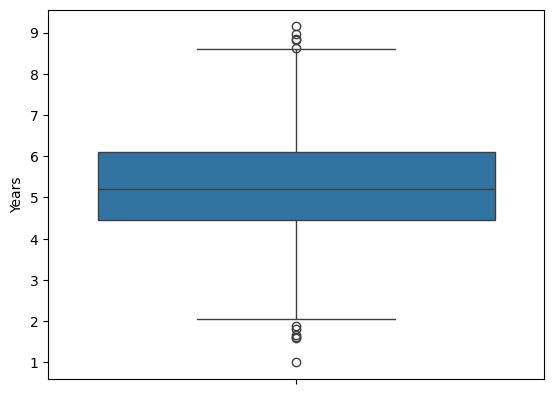

In [164]:
sns.boxplot(df['Years'])

In [165]:
percentile25 = df['Years'].quantile(0.25)
percentile75 = df['Years'].quantile(0.75)
iqr = percentile75 - percentile25

In [166]:
upper_limit_2 = percentile75 + 1.5 * iqr
lower_limit_2 = percentile25 - 1.5 * iqr
print(upper_limit_2,lower_limit_2)

8.600000000000001 1.96


In [167]:
df['Years'] = np.where(
    df['Years']>upper_limit_2,
    upper_limit_2,
    np.where(
        df['Years']<lower_limit_2,
        lower_limit_2,
        df['Years']
    )
)

<Axes: ylabel='Num_Sites'>

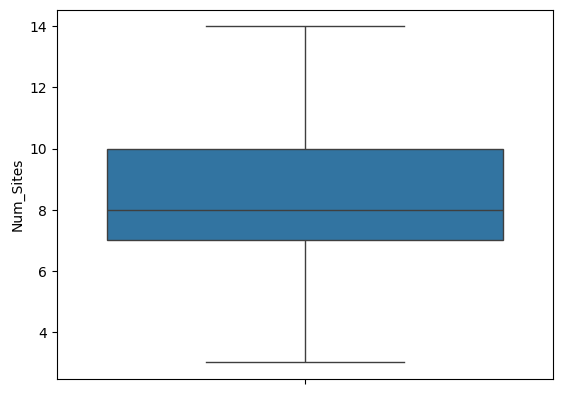

In [168]:
sns.boxplot(df['Num_Sites'])

In [169]:
df = df.drop(['Onboard_date', 'Names', 'Location', 'Company'], axis=1)

In [170]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [171]:
num_features = ['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features)
])

In [172]:
X = preprocessor.fit_transform(X)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [175]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [176]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [177]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4693 - loss: 0.6979 - val_accuracy: 0.8222 - val_loss: 0.5829
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8522 - loss: 0.5510 - val_accuracy: 0.8222 - val_loss: 0.4637
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8560 - loss: 0.4143 - val_accuracy: 0.8222 - val_loss: 0.3808
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8516 - loss: 0.3793 - val_accuracy: 0.8500 - val_loss: 0.3317
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8543 - loss: 0.3324 - val_accuracy: 0.8722 - val_loss: 0.3044
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8809 - loss: 0.2919 - val_accuracy: 0.8833 - val_loss: 0.2937
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8935 - loss: 0.2733 - val_accuracy: 0.8889 - val_loss: 0.2897
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8871 - loss: 0.2910 - val_accuracy: 0.8889 - 

In [178]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Validation Accuracy:", accuracy_score(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Validation Accuracy: 0.9


In [179]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.75      0.66      0.70        32

    accuracy                           0.90       180
   macro avg       0.84      0.80      0.82       180
weighted avg       0.90      0.90      0.90       180

ROC AUC: 0.8044763513513513
